In [1]:
N = (31 + 4) % 5 + 1 # Варіант за списком 31

In [2]:
N

1

In [7]:
import pandas as pd

data = pd.read_csv('NationalNames.csv')

data.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


In [6]:
data.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


In [8]:
data.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

In [9]:
unique_names_count = data['Name'].nunique()

unique_names_count

93889

In [10]:
unique_names_per_year = data.groupby('Year')['Name'].nunique()

unique_names_per_year

Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64

In [11]:
unique_names_per_year = pd.DataFrame(data.groupby('Year')['Name'].nunique()).reset_index()
unique_names_per_year.columns = ['Year', 'UniqueNameCount']

year_with_max_unique_names = unique_names_per_year.loc[unique_names_per_year['UniqueNameCount'].idxmax()]

year_with_max_unique_names

Year                2008
UniqueNameCount    32488
Name: 128, dtype: int64

In [13]:
year_with_most_unique_names = data.groupby('Year')['Name'].nunique().idxmax()
data_year = data[data['Year'] == year_with_most_unique_names]

most_popular_name = data_year.loc[data_year['Count'].idxmax(), 'Name']
most_popular_name_count = data_year['Count'].max()

print(f"Рік з найбільшою кількістю унікальних імен: {year_with_most_unique_names}")
print(f"Найпопулярніше ім'я в цьому році: {most_popular_name} з кількістю {most_popular_name_count}")

Рік з найбільшою кількістю унікальних імен: 2008
Найпопулярніше ім'я в цьому році: Jacob з кількістю 22568


In [14]:
jacob_female = data[(data['Name'] == 'Jacob') & (data['Gender'] == 'F')]

if not jacob_female.empty:
    year_most_popular_jacob_female = jacob_female.loc[jacob_female['Count'].idxmax(), 'Year']
    count_most_popular_jacob_female = jacob_female['Count'].max()
    
    print(f"Рік, коли ім'я 'Jacob' було найпопулярнішим серед жіночих імен: {year_most_popular_jacob_female}")
    print(f"Кількість у цей рік: {count_most_popular_jacob_female}")
else:
    print("Ім'я 'Jacob' не зустрічалося серед жіночих імен.")

Рік, коли ім'я 'Jacob' було найпопулярнішим серед жіночих імен: 2004
Кількість у цей рік: 171


In [15]:
neutral_names = data.groupby(['Year', 'Name'])['Gender'].nunique().reset_index()
neutral_names = neutral_names[neutral_names['Gender'] == 2]

neutral_names_count = neutral_names.groupby('Year').size()

year_most_neutral_names = neutral_names_count.idxmax()
max_neutral_names_count = neutral_names_count.max()

print(f"Рік із найбільшою кількістю гендерно нейтральних імен: {year_most_neutral_names}")
print(f"Кількість гендерно нейтральних імен у цей рік: {max_neutral_names_count}")

Рік із найбільшою кількістю гендерно нейтральних імен: 2008
Кількість гендерно нейтральних імен у цей рік: 2557


In [16]:
total_births_per_year = data.groupby('Year')['Count'].sum()

print("Загальна кількість народжень за кожен рік:")
print(total_births_per_year)

Загальна кількість народжень за кожен рік:
Year
1880     201484
1881     192699
1882     221538
1883     216950
1884     243467
         ...   
2010    3686589
2011    3646730
2012    3643336
2013    3626802
2014    3670151
Name: Count, Length: 135, dtype: int64


In [17]:
total_births_per_year = data.groupby('Year')['Count'].sum()

year_most_births = total_births_per_year.idxmax()
max_births = total_births_per_year.max()

print(f"Рік, коли народилося найбільше дітей: {year_most_births}")
print(f"Кількість народжень у цей рік: {max_births}")

Рік, коли народилося найбільше дітей: 1957
Кількість народжень у цей рік: 4200026


In [18]:
births_by_gender_year = data.groupby(['Year', 'Gender'])['Count'].sum().unstack()

print("Кількість дівчаток та хлопчиків, які народились кожного року:")
print(births_by_gender_year)

Кількість дівчаток та хлопчиків, які народились кожного року:
Gender        F        M
Year                    
1880      90993   110491
1881      91954   100745
1882     107850   113688
1883     112321   104629
1884     129022   114445
...         ...      ...
2010    1772738  1913851
2011    1753500  1893230
2012    1753922  1889414
2013    1745339  1881463
2014    1768775  1901376

[135 rows x 2 columns]


In [24]:
births_by_gender_year = data.groupby(['Year', 'Gender'])['Count'].sum().unstack()
years_more_females = (births_by_gender_year['F'] > births_by_gender_year['M']).sum()

years_more_females

54

In [23]:
barbara_male = data[(data['Name'] == 'Barbara') & (data['Gender'] == 'M')]
total_barbara_male = barbara_male['Count'].sum()

total_barbara_male

4139

In [22]:
num_years = data['Year'].nunique()

num_years

135

In [25]:
neutral_names = data.groupby(['Year', 'Name'])['Gender'].nunique().reset_index()
neutral_names = neutral_names[neutral_names['Gender'] == 2]

all_years = set(data['Year'].unique())
names_by_year = neutral_names.groupby('Name')['Year'].apply(set)
consistent_neutral_names = [name for name, years in names_by_year.items() if years == all_years]

popular_names = data[data['Name'].isin(consistent_neutral_names)].groupby('Name')['Count'].sum()
popular_names = popular_names.sort_values(ascending=False)

popular_names

Name
James      5129096
John       5106590
Robert     4816785
William    4071368
Joseph     2580687
Jean        480901
Jesse       421406
Leslie      376587
Francis     312147
Lee         291691
Jessie      274931
Marion      259549
Johnnie     149953
Sidney      105185
Ollie        56482
Tommie       51315
Name: Count, dtype: int64

In [27]:
name_counts = data.groupby('Name')['Count'].sum()

unpopular_names = name_counts[name_counts < 150]

most_popular_of_unpopular = unpopular_names.idxmax()
most_popular_of_unpopular_count = unpopular_names.max()

print(f"Найпопулярніше серед непопулярних імен: {most_popular_of_unpopular}")
print(f"Кількість використань цього імені: {most_popular_of_unpopular_count}")

Найпопулярніше серед непопулярних імен: Abrina
Кількість використань цього імені: 149


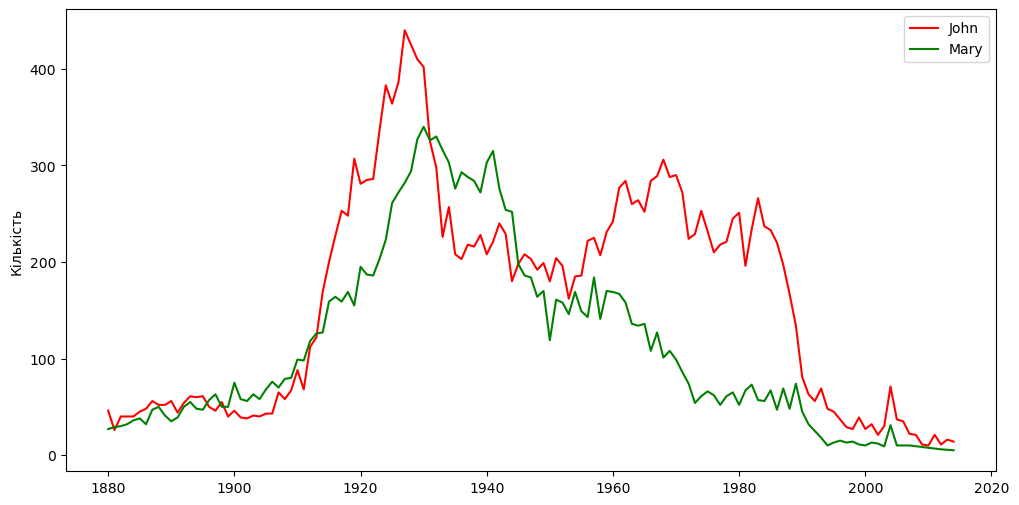

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('NationalNames.csv')

john_female = data[(data['Name'] == 'John') & (data['Gender'] == 'F')]
mary_male = data[(data['Name'] == 'Mary') & (data['Gender'] == 'M')]

plt.figure(figsize=(12, 6))

plt.plot(john_female['Year'], john_female['Count'], label="John", color='red')

plt.plot(mary_male['Year'], mary_male['Count'], label="Mary", color='green')

plt.ylabel("Кількість")
plt.legend()

plt.show()